In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.tree as sk_tree
import imblearn.over_sampling as imb_over_sampling
import sklearn.utils as sk_utils
import sklearn.model_selection as sk_model_selection
import sklearn.metrics as sk_metrics



df = pd.read_csv('Sample_data.csv', delimiter=';')

*Different Informations*

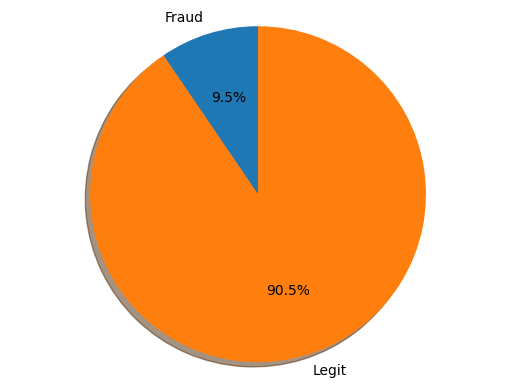

Number of users in the dataset:  599
Number of features in the dataset:  31
Number of fraudulent transactions:  57
Number of legitimate transactions:  542


In [125]:
df = pd.read_csv('Sample_data.csv', delimiter=';')
if 'V1' in df.columns:
    count = df['Class'].value_counts()
    lables = ['Fraud', 'Legit']
    size = [count[1], count[0]]

    plt.pie(size, labels=lables, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.show()
else:
    print("The 'Class' column does not exist in the dataframe.")


print("Number of users in the dataset: ", len(df))
print("Number of features in the dataset: ", len(df.columns))



fraud = df[df.Class == 1]
legit = df[df.Class == 0]

print("Number of fraudulent transactions: ", len(fraud))
print("Number of legitimate transactions: ", len(legit))




Now we need to find a solution to get a better classification of out fraud cases.
On one hand, simply oversampling would cause most of the points to be on top of each other. On the other hand, undersampling woukd reduce the number of legitimate cases, losing a lot of useful information.
We use both undersampling and oversampling in order to get the best result. For this project, I've decided to ratio both operations at 50%.

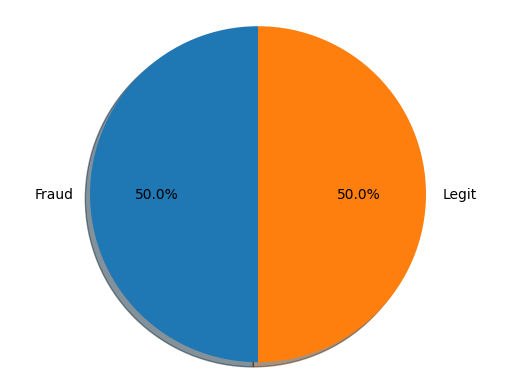

In [126]:
samples = len(legit) // 2
fraud_oversampled =  sk_utils.resample(fraud, replace=True, n_samples=samples, random_state=42)
legit_undersampled = sk_utils.resample(legit, replace=False, n_samples=samples, random_state=42)

df_resample = pd.concat([legit_undersampled, fraud_oversampled])
count_resample = df_resample['Class'].value_counts()
size_resample = [count_resample[1], count_resample[0]] 

plt.pie(size_resample, labels=lables, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()


*We can also use SMOT to balance our dataset.* 

In [127]:
df = df.replace(',', '.', regex=True)
X = df.drop('Class', axis=1)  # Features
y = df['Class']               # Labels (target)

sm = imb_over_sampling.SMOTE(sampling_strategy=0.5, random_state=42)  # 0.5 means 50% of the majority class

X_res, y_res = sm.fit_resample(X, y)

print("Original class distribution:")
print(y.value_counts())
print("\nResampled class distribution:")
print(pd.Series(y_res).value_counts())


Original class distribution:
Class
0    542
1     57
Name: count, dtype: int64

Resampled class distribution:
Class
0    542
1    271
Name: count, dtype: int64


In [128]:
X_train, X_test, y_train, y_test = sk_model_selection.train_test_split(X_res, y_res, test_size=0.7, random_state=42)

tree_clf = sk_tree.DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_res, y_res)


y_pred = tree_clf.predict(X_test)
accuracy_score = sk_metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_score)

cm = sk_metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", cm)


Accuracy:  1.0
Confusion matrix: 
 [[382   0]
 [  0 188]]


Important to note, since my sample size used for this problem is too low, my accuracy score is 1.0. 